In [1]:
import pandas as pd
import altair as alt
from altair import datum

In [2]:
alt.renderers.enable('notebook')
pd.set_option('display.max_columns', 110)

# Headline 1

## Subhead 1
### Subhead 2

In [3]:
v_data = pd.read_csv('az_violations.csv', dtype = {'naic_cd' : str})

In [4]:
v_data.head()

,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,findings_start_date,findings_end_date,flsa_violtn_cnt,flsa_repeat_violator,flsa_bw_atp_amt,flsa_ee_atp_cnt,flsa_mw_bw_atp_amt,flsa_ot_bw_atp_amt,flsa_15a3_bw_atp_amt,flsa_cmp_assd_amt,sca_violtn_cnt,sca_bw_atp_amt,sca_ee_atp_cnt,mspa_violtn_cnt,mspa_bw_atp_amt,mspa_ee_atp_cnt,mspa_cmp_assd_amt,h1b_violtn_cnt,h1b_bw_atp_amt,h1b_ee_atp_cnt,h1b_cmp_assd_amt,fmla_violtn_cnt,fmla_bw_atp_amt,fmla_ee_atp_cnt,fmla_cmp_assd_amt,flsa_cl_violtn_cnt,flsa_cl_minor_cnt,flsa_cl_cmp_assd_amt,dbra_cl_violtn_cnt,dbra_bw_atp_amt,dbra_ee_atp_cnt,h2a_violtn_cnt,h2a_bw_atp_amt,h2a_ee_atp_cnt,h2a_cmp_assd_amt,flsa_smw14_violtn_cnt,flsa_smw14_bw_amt,flsa_smw14_ee_atp_cnt,cwhssa_violtn_cnt,cwhssa_bw_amt,cwhssa_ee_cnt,osha_violtn_cnt,osha_bw_atp_amt,osha_ee_atp_cnt,osha_cmp_assd_amt,eppa_violtn_cnt,eppa_bw_atp_amt,eppa_ee_cnt,eppa_cmp_assd_amt,h1a_violtn_cnt,h1a_bw_atp_amt,h1a_ee_atp_cnt,h1a_cmp_assd_amt,crew_violtn_cnt,crew_bw_atp_amt,crew_ee_atp_cnt,crew_cmp_assd_amt,ccpa_violtn_cnt,ccpa_bw_atp_amt,ccpa_ee_atp_cnt,flsa_smwpw_violtn_cnt,flsa_smwpw_bw_atp_amt,flsa_smwpw_ee_atp_cnt,flsa_hmwkr_violtn_cnt,flsa_hmwkr_bw_atp_amt,flsa_hmwkr_ee_atp_cnt,flsa_hmwkr_cmp_assd_amt,ca_violtn_cnt,ca_bw_atp_amt,ca_ee_atp_cnt,pca_violtn_cnt,pca_bw_atp_amt,pca_ee_atp_cnt,flsa_smwap_violtn_cnt,flsa_smwap_bw_atp_amt,flsa_smwap_ee_atp_cnt,flsa_smwft_violtn_cnt,flsa_smwft_bw_atp_amt,flsa_smwft_ee_atp_cnt,flsa_smwl_violtn_cnt,flsa_smwl_bw_atp_amt,flsa_smwl_ee_atp_cnt,flsa_smwmg_violtn_cnt,flsa_smwmg_bw_atp_amt,flsa_smwmg_ee_atp_cnt,flsa_smwsl_violtn_cnt,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
0,1475069,Mr. Q's Enterprises.,Mr. Q's Inc.,255 West Wilcox Street,Sierra Vista,AZ,85635.0,722310,Food Service Contractors,174,0.0,173,186357.45,171,2006-11-01,2007-04-30,0,NaN,0.00,0,0.0,0.00,0.0,0.0,174,186357.45,171,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
1,1763808,Benson Volunteer Fire Department,Benson Volunteer Fire Department,375 E. 7th St,Benson,AZ,85602.0,09620,Local Fire Protection,3,0.0,0,0.00,0,2012-10-27,2015-10-23,0,NaN,0.00,0,0.0,0.00,0.0,0.0,0,0.00,0,0,0.0,0,0.0,0,0.0,0,0,2,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2016-06-11 02:22:25.040000 AMERICA/NEW_YORK
2,1668161,"Leisure Concepts International, Inc.","Leisure Concepts International, Inc.",2745 N. Kiowa Blvd,Lake Havasu City,AZ,86404.0,42499,Other Miscellaneous Nondurable Goods Merchant ...,1,0.0,1,256.50,1,2011-09-12,2012-08-16,1,NaN,256.50,1,0.0,256.50,0.0,0.0,0,0.00,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
3,1741818,Hinkle Construction Inc.,Hinkle Construction Inc.,1905 N Williams,Mesa,AZ,85203.0,238990,All Other Specialty Trade Contractors,1,0.0,0,0.00,0,2012-09-15,2014-09-12,1,NaN,0.00,0,0.0,0.00,0.0,0.0,0,0.00,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,2015-04-01 01:00:03.975000 AMERICA/NEW_YORK
4,1742855,"Superior View, LLC","Superior View, LLC",9950 W Van Buren St,Avondale,AZ,85323.0,541320,Landscape Architectural Services,5,0.0,5,2643.14,5,2013-10-01,2014-03-09,5,NaN,2643.14,5,0.0,2643.14,0.0,0.0,0,0.00,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0

In [5]:
v_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Columns: 110 entries, case_id to ld_dt
dtypes: float64(23), int64(76), object(11)
memory usage: 3.6+ MB


In [26]:
for column in v_data.columns:
    print(column)

case_id
trade_nm
legal_name
street_addr_1_txt
cty_nm
st_cd
zip_cd
naic_cd
naics_code_description
case_violtn_cnt
cmp_assd_cnt
ee_violtd_cnt
bw_atp_amt
ee_atp_cnt
findings_start_date
findings_end_date
flsa_violtn_cnt
flsa_repeat_violator
flsa_bw_atp_amt
flsa_ee_atp_cnt
flsa_mw_bw_atp_amt
flsa_ot_bw_atp_amt
flsa_15a3_bw_atp_amt
flsa_cmp_assd_amt
sca_violtn_cnt
sca_bw_atp_amt
sca_ee_atp_cnt
mspa_violtn_cnt
mspa_bw_atp_amt
mspa_ee_atp_cnt
mspa_cmp_assd_amt
h1b_violtn_cnt
h1b_bw_atp_amt
h1b_ee_atp_cnt
h1b_cmp_assd_amt
fmla_violtn_cnt
fmla_bw_atp_amt
fmla_ee_atp_cnt
fmla_cmp_assd_amt
flsa_cl_violtn_cnt
flsa_cl_minor_cnt
flsa_cl_cmp_assd_amt
dbra_cl_violtn_cnt
dbra_bw_atp_amt
dbra_ee_atp_cnt
h2a_violtn_cnt
h2a_bw_atp_amt
h2a_ee_atp_cnt
h2a_cmp_assd_amt
flsa_smw14_violtn_cnt
flsa_smw14_bw_amt
flsa_smw14_ee_atp_cnt
cwhssa_violtn_cnt
cwhssa_bw_amt
cwhssa_ee_cnt
osha_violtn_cnt
osha_bw_atp_amt
osha_ee_atp_cnt
osha_cmp_assd_amt
eppa_violtn_cnt
eppa_bw_atp_amt
eppa_ee_cnt
eppa_cmp_assd_amt
h1a_viol

In [32]:
az_industry_v = pd.pivot_table(v_data, index = 'naics_code_description', 
                                   values = 'case_id', 
                                   aggfunc = 'count', margins = True).sort_values(by = 'case_id', ascending = False)
az_industry_v

,case_id
naics_code_description,
All,4331
Full-Service Restaurants,309
Hotels (except Casino Hotels) and Motels,146
Limited-Service Restaurants,143
"Plumbing, Heating, and Air-Conditioning Contractors",95
Janitorial Services,88
Farm Labor Contractors and Crew Leaders,85
Electrical Contractors and Other Wiring Installation Contractors,81
Car Washes,77


In [40]:
az_totalindustry_v = pd.pivot_table(v_data, index = 'naics_code_description',
                                   values = 'case_violtn_cnt', 
                                   aggfunc = 'sum',margins = True).sort_values(by = 'case_violtn_cnt', ascending = False)
az_totalindustry_v

,case_violtn_cnt
naics_code_description,
All,244105
State School Boards or Districts,130763
Full-Service Restaurants,7889
"Colleges, Universities, and Professional Schools",4604
Janitorial Services,4006
Ambulance Services,3708
Farm Labor Contractors and Crew Leaders,3108
Car Washes,3040
Drywall and Insulation Contractors,3025


In [42]:
v_azschools = pd.read_csv('az_schools.csv', dtype = {'naic_cd' : str})
v_azschools

,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,findings_start_date,findings_end_date,flsa_violtn_cnt,flsa_repeat_violator,flsa_bw_atp_amt,flsa_ee_atp_cnt,flsa_mw_bw_atp_amt,flsa_ot_bw_atp_amt,flsa_15a3_bw_atp_amt,flsa_cmp_assd_amt,sca_violtn_cnt,sca_bw_atp_amt,sca_ee_atp_cnt,mspa_violtn_cnt,mspa_bw_atp_amt,mspa_ee_atp_cnt,mspa_cmp_assd_amt,h1b_violtn_cnt,h1b_bw_atp_amt,h1b_ee_atp_cnt,h1b_cmp_assd_amt,fmla_violtn_cnt,fmla_bw_atp_amt,fmla_ee_atp_cnt,fmla_cmp_assd_amt,flsa_cl_violtn_cnt,flsa_cl_minor_cnt,flsa_cl_cmp_assd_amt,dbra_cl_violtn_cnt,dbra_bw_atp_amt,dbra_ee_atp_cnt,h2a_violtn_cnt,h2a_bw_atp_amt,h2a_ee_atp_cnt,h2a_cmp_assd_amt,flsa_smw14_violtn_cnt,flsa_smw14_bw_amt,flsa_smw14_ee_atp_cnt,cwhssa_violtn_cnt,cwhssa_bw_amt,cwhssa_ee_cnt,osha_violtn_cnt,osha_bw_atp_amt,osha_ee_atp_cnt,osha_cmp_assd_amt,eppa_violtn_cnt,eppa_bw_atp_amt,eppa_ee_cnt,eppa_cmp_assd_amt,h1a_violtn_cnt,h1a_bw_atp_amt,h1a_ee_atp_cnt,h1a_cmp_assd_amt,crew_violtn_cnt,crew_bw_atp_amt,crew_ee_atp_cnt,crew_cmp_assd_amt,ccpa_violtn_cnt,ccpa_bw_atp_amt,ccpa_ee_atp_cnt,flsa_smwpw_violtn_cnt,flsa_smwpw_bw_atp_amt,flsa_smwpw_ee_atp_cnt,flsa_hmwkr_violtn_cnt,flsa_hmwkr_bw_atp_amt,flsa_hmwkr_ee_atp_cnt,flsa_hmwkr_cmp_assd_amt,ca_violtn_cnt,ca_bw_atp_amt,ca_ee_atp_cnt,pca_violtn_cnt,pca_bw_atp_amt,pca_ee_atp_cnt,flsa_smwap_violtn_cnt,flsa_smwap_bw_atp_amt,flsa_smwap_ee_atp_cnt,flsa_smwft_violtn_cnt,flsa_smwft_bw_atp_amt,flsa_smwft_ee_atp_cnt,flsa_smwl_violtn_cnt,flsa_smwl_bw_atp_amt,flsa_smwl_ee_atp_cnt,flsa_smwmg_violtn_cnt,flsa_smwmg_bw_atp_amt,flsa_smwmg_ee_atp_cnt,flsa_smwsl_violtn_cnt,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
0,1464246,Glendale Union High School,Glendale Union High School District,4508 W. Northern Avenue,Glendale,AZ,85302,09240,State School Boards or Districts,0,0,1,0.00,0,2006-03-01,2007-03-02,0,NaN,0.00,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
1,1745038,Altar Valley School District,Altar Valley Elementary School District #51,10105 S Sasabe Road,Tucson,AZ,85736,09240,State School Boards or Districts,5,924,4,14468.73,3,2012-11-15,2014-11-14,5,W,14468.73,3,0,14468.73,0,924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-05-08 01:00:06.172000 AMERICA/NEW_YORK
2,1666010,Mohave Valley Elementary School District,Mohave Valley Elementary School District,8450 S. Olive St,Mohave Valley,AZ,86440,09240,State School Boards or Districts,130705,0,1,0.00,0,2012-07-23,2012-10-01,0,NaN,0.00,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,130705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
3,1586388,Tolleson Union High School District,NaN,9801 W. Van Buren Street,Tolleson,AZ,85353,09240,State School Boards or Districts,52,0,52,24542.44,52,2008-08-08,2010-03-19,52,NaN,24542.44,52,0,24542.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
4,1400107,Mammoth - San Manuel Schools,Mammoth-San Manuel Unified School District #8,P.O. Box 406,San Manuel,AZ,85631,09240,State School Boards or Districts,1,0,1,196.35,1,2003-04-01,2005-04-01,1,NaN,196.35,1,0,196.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02

In [60]:
food_service_az = pd.read_csv('food_service_az.csv', dtype = {'naic_cd' : str})
pd.set_option('display.max_rows', 310)

In [61]:
food_service_az


,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,findings_start_date,findings_end_date,flsa_violtn_cnt,flsa_repeat_violator,flsa_bw_atp_amt,flsa_ee_atp_cnt,flsa_mw_bw_atp_amt,flsa_ot_bw_atp_amt,flsa_15a3_bw_atp_amt,flsa_cmp_assd_amt,sca_violtn_cnt,sca_bw_atp_amt,sca_ee_atp_cnt,mspa_violtn_cnt,mspa_bw_atp_amt,mspa_ee_atp_cnt,mspa_cmp_assd_amt,h1b_violtn_cnt,h1b_bw_atp_amt,h1b_ee_atp_cnt,h1b_cmp_assd_amt,fmla_violtn_cnt,fmla_bw_atp_amt,fmla_ee_atp_cnt,fmla_cmp_assd_amt,flsa_cl_violtn_cnt,flsa_cl_minor_cnt,flsa_cl_cmp_assd_amt,dbra_cl_violtn_cnt,dbra_bw_atp_amt,dbra_ee_atp_cnt,h2a_violtn_cnt,h2a_bw_atp_amt,h2a_ee_atp_cnt,h2a_cmp_assd_amt,flsa_smw14_violtn_cnt,flsa_smw14_bw_amt,flsa_smw14_ee_atp_cnt,cwhssa_violtn_cnt,cwhssa_bw_amt,cwhssa_ee_cnt,osha_violtn_cnt,osha_bw_atp_amt,osha_ee_atp_cnt,osha_cmp_assd_amt,eppa_violtn_cnt,eppa_bw_atp_amt,eppa_ee_cnt,eppa_cmp_assd_amt,h1a_violtn_cnt,h1a_bw_atp_amt,h1a_ee_atp_cnt,h1a_cmp_assd_amt,crew_violtn_cnt,crew_bw_atp_amt,crew_ee_atp_cnt,crew_cmp_assd_amt,ccpa_violtn_cnt,ccpa_bw_atp_amt,ccpa_ee_atp_cnt,flsa_smwpw_violtn_cnt,flsa_smwpw_bw_atp_amt,flsa_smwpw_ee_atp_cnt,flsa_hmwkr_violtn_cnt,flsa_hmwkr_bw_atp_amt,flsa_hmwkr_ee_atp_cnt,flsa_hmwkr_cmp_assd_amt,ca_violtn_cnt,ca_bw_atp_amt,ca_ee_atp_cnt,pca_violtn_cnt,pca_bw_atp_amt,pca_ee_atp_cnt,flsa_smwap_violtn_cnt,flsa_smwap_bw_atp_amt,flsa_smwap_ee_atp_cnt,flsa_smwft_violtn_cnt,flsa_smwft_bw_atp_amt,flsa_smwft_ee_atp_cnt,flsa_smwl_violtn_cnt,flsa_smwl_bw_atp_amt,flsa_smwl_ee_atp_cnt,flsa_smwmg_violtn_cnt,flsa_smwmg_bw_atp_amt,flsa_smwmg_ee_atp_cnt,flsa_smwsl_violtn_cnt,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
0,1582232,Ninja Sushi,Ninja Sushi,1400 E. 16th Street,Yuma,AZ,85365,722110,Full-Service Restaurants,10,0.00,9,8886.64,9,2009-12-21,2010-07-11,10,NaN,8886.64,9,0.00,8886.64,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
1,1510074,El Guero Canelo,"El Guero Canelo Placita, Inc.","2480 N. Oracle Road, Suite 130",Tucson,AZ,85705,722110,Full-Service Restaurants,17,0.00,17,640.00,17,2006-04-15,2008-04-15,17,R,640.00,17,0.00,640.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
2,1490787,"Takamatsu, Inc.",Takamatsu Inc.,5532 E. Speedway Blvd.,Tucson,AZ,85712,722110,Full-Service Restaurants,14,0.00,14,27083.14,14,2006-05-20,2008-05-15,14,NaN,27083.14,14,0.00,27083.14,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
3,1513387,AJO AL'S Mexican Cafe,"AJO AL'S-ARROWHEAD,L.L.C.",7458 W. Bell Road,Glendale,AZ,85308,722110,Full-Service Restaurants,0,0.00,0,0.00,0,2005-04-11,2008-04-10,0,NaN,0.00,0,0.00,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
4,1484184,China Buffet,"China Buffet Surprise, INC",17119 N Litchfield Rd,Surprise,AZ,85379,72211,Full-Service Restaurants,0,0.00,0,0.00,0,2007-06-21,2009-05-31,0,NaN,0.00,0,0.00,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20 01:00:06.112000 AMERICA/NEW_YORK
5,1519491,Zuma Grill,"3-Deep Bar Concepts, LLC",605 S. Mill Avenue

In [52]:
counts_foodservice = pd.pivot_table(food_service_az, index = 'trade_nm',
                                   values = ['case_violtn_cnt', 'bw_atp_amt'], 
                                   aggfunc = 'sum',margins = True).sort_values(by = 'bw_atp_amt', ascending = False)
counts_foodservice

,bw_atp_amt,case_violtn_cnt
trade_nm,,
All,3230206.95,7889
China Super Buffet Phoenix,418937.18,26
Julio G's,150423.66,55
Chuy's Mesquite Broiler,116188.09,125
Saddle Ranch Chop House,90900.13,784
Dillons Restaurant,88730.43,237
Rancho de tia Rosa,85006.42,14
Casey Moore's Oyster House,75610.51,24
Wallys Pub and Grill,70772.56,13


In [76]:
food_by_city = food_service_az[['cty_nm', 'case_violtn_cnt', 'findings_start_date']].groupby(by = ['cty_nm', 'findings_start_date'], as_index = False).count().sort_values(by = 'findings_start_date', ascending = False)

food_by_city

,cty_nm,findings_start_date,case_violtn_cnt
194,Sierra Vista,2016-11-26,1
75,Nogales,2016-06-01,1
45,Globe,2016-03-01,1
217,Thatcher,2015-11-07,1
52,Green Valley,2015-11-03,1
288,Winslow,2015-11-03,1
9,Casa Grande,2015-11-03,1
44,Globe,2015-11-02,1
193,Sierra Vista,2015-11-01,1
145,Saint Michaels,2015-08-06,1


In [80]:
citynm_group = food_service_az[['cty_nm', 'case_violtn_cnt']].groupby(by = ['cty_nm',], as_index = False).count().sort_values(by = 'case_violtn_cnt', ascending = False)

citynm_group

,cty_nm,case_violtn_cnt
50,Tucson,73
34,Phoenix,53
40,Scottsdale,33
47,Tempe,16
15,Glendale,10
27,Mesa,9
41,Sedona,8
54,Yuma,7
11,Flagstaff,6
6,Chandler,6


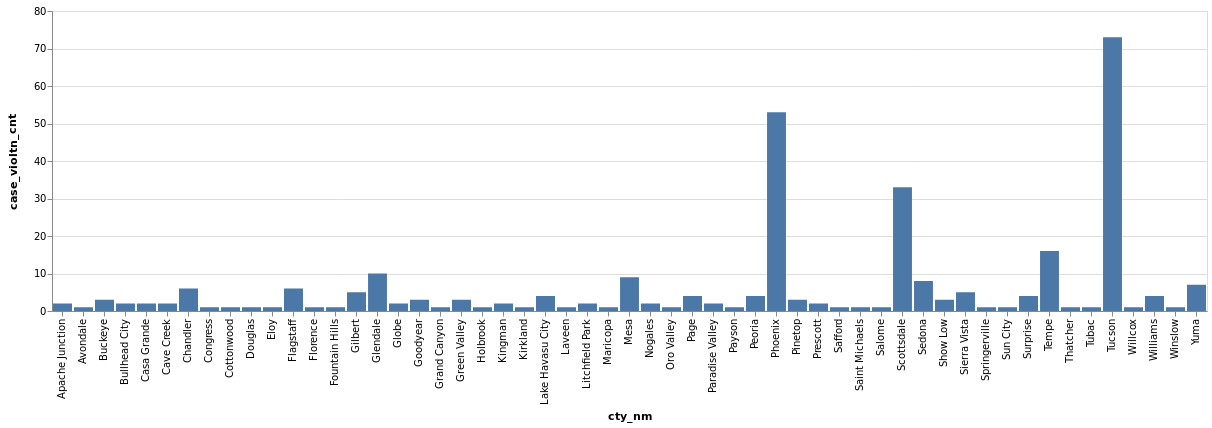

In [103]:
alt.Chart(citynm_group).mark_bar().encode(x = 'cty_nm', y = 'case_violtn_cnt')

In [105]:
cities = ['Tucson', 'Phoenix', 'Scottsdale', 'Tempe', 'Glendale', 'Mesa', 'Sedona', 'Yuma', 'Flagstaff', 'Chandler']
food_by_city_filtered = citynm_group[citynm_group['cty_nm'].isin(cities)]
food_by_city_filtered

,cty_nm,case_violtn_cnt
50,Tucson,73
34,Phoenix,53
40,Scottsdale,33
47,Tempe,16
15,Glendale,10
27,Mesa,9
41,Sedona,8
54,Yuma,7
11,Flagstaff,6
6,Chandler,6


In [ ]:
alt.Chart(stops_by_county).mark_bar().encode(x = 'traffic_stops', y = 'county')

# Violations by City


### Top 10 full-service restaurant industries violating cities in Arizona from 2005-2015

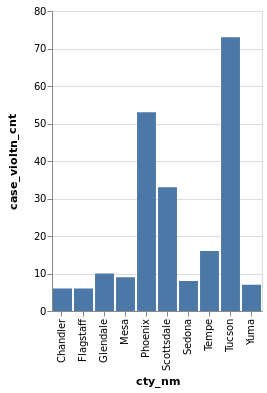

In [106]:
alt.Chart(food_by_city_filtered).mark_bar().encode(x = 'cty_nm', y = 'case_violtn_cnt')

In [90]:
food_by_city_filtered['findings_start_date'] = pd.to_datetime(food_by_city_filtered['findings_start_date'])

/home/newshack/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
food_16 = food_by_city_filtered[food_by_city_filtered['findings_start_date'] >= '2009-01-01']

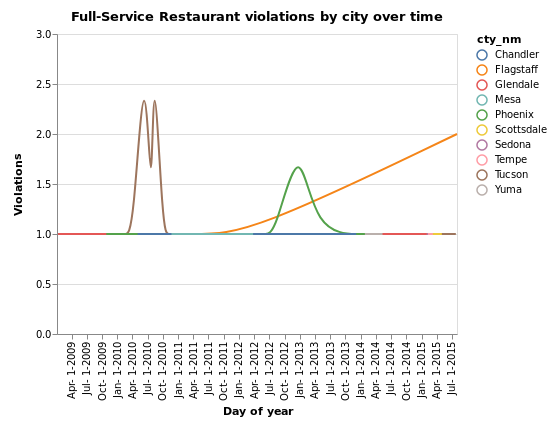

In [102]:
alt.Chart(
    food_16, 
    padding = 10, 
    title = 'Full-Service Restaurant violations by city over time'
).mark_line(
    interpolate = 'basis', 
).encode(
    x = alt.X(
        'findings_start_date:T', 
        axis = alt.Axis(
            title = 'Day of year', 
            format = '%b-%e-%Y', 
            labelAngle = -90, 
            labelFlush = True, 
            tickCount = 26, 
            grid = False)), 
    y = alt.Y(
        'case_violtn_cnt:Q', 
        axis = alt.Axis(
            title = 'Violations')),
    color = 'cty_nm'
    )